1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [ ]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

[[-0.03302526 -0.50365026 -0.17237496 ...  1.58844718 -0.68498718
   0.80118176]
 [ 2.2631812   2.71658785  1.32369478 ... -0.527503    0.80230954
   2.73434712]
 [ 2.19713068  1.70928733  0.97894486 ...  2.64939136 -0.56766482
   4.33671065]]
Eigenvalues (Eigendecomposition):
 [2.48605228e+01 2.06626169e+00 5.01771722e-16]
Eigenvectors (Eigendecomposition):
 [[-0.12118527  0.56448868 -0.81649658]
 [-0.57016934 -0.71290971 -0.40824829]
 [-0.81253988  0.41606764  0.40824829]]
****************************

SVD Eigenvalues:
 [2.48605786e+01 2.06721675e+00 9.75430665e-31]
SVD Eigenvectors:
 [[-0.12119099  0.56448745 -0.81649658]
 [-0.57016212 -0.71291549 -0.40824829]
 [-0.81254409  0.41605941  0.40824829]]
****************************

By selecting the component 0, we retain 92.33% of the total variability
By selecting the component 1, we retain 7.67% of the total variability
By selecting the component 2, we retain 0.00% of the total variability
These percentages of total variability make 

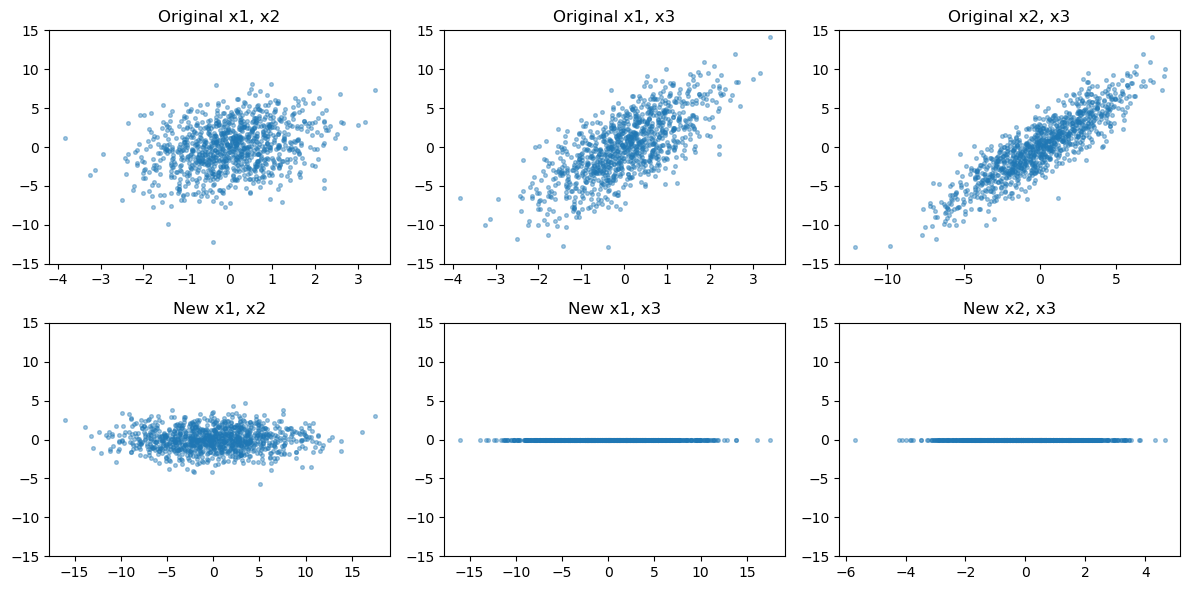

In [5]:
N= 1000
mu1, sigma1 = 0, 1
mu2, sigma2 = 0, 3

x1 = np.random.normal(mu1, sigma1, N)
x2 = x1 + np.random.normal(mu2, sigma2, N)
x3 = 2*x1 + x2
X = np.array([x1, x2, x3])
print(X)
#PCA using eigendecomposition
covX = np.cov(X)
l, V = la.eig(covX)
idx = l.argsort()[::-1]
l = l[idx]
V = V[:,idx]

# Eigenvalues and eigenvectors using eigendecomposition
print("Eigenvalues (Eigendecomposition):\n", np.real_if_close(l))
print("Eigenvectors (Eigendecomposition):\n", V)
print("****************************\n")
U, S, Vs = la.svd(X)
L = S**2/ (N-1)
print("SVD Eigenvalues:\n", L)
print("SVD Eigenvectors:\n", U)
print("****************************\n")

Lambda = np.diag(np.real_if_close(l))
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()*100))
print("These percentages of total variability make sense,")
print("as x3 is entirely based on the other two variables and has no independent dispersion,")
print("expecting one of the components to have no effect on variation.")
print("For retaining more than 99% of the dataset, choosing the first and second components is advisable.\n\n")

Xp = np.dot(V.T, X)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(X[0], X[1], alpha = 0.4, s=7)
ax01.set_title('Original x1, x2')
ax02.scatter(X[0], X[2], alpha = 0.4, s=7)
ax02.set_title('Original x1, x3')
ax03.scatter(X[1], X[2], alpha = 0.4, s=7)
ax03.set_title('Original x2, x3')

ax11.scatter(Xp[0], Xp[1], alpha = 0.4, s=7)
ax11.set_title('New x1, x2')
ax12.scatter(Xp[0], Xp[2], alpha = 0.4, s=7)
ax12.set_title('New x1, x3')
ax13.scatter(Xp[1], Xp[2], alpha = 0.4, s=7)
ax13.set_title('New x2, x3')

plt.setp(axes,ylim=[-15, 15])
plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

SVD Eigenvalues (with Noise):
 [2.48605918e+01 2.06722586e+00 1.26047790e-03 1.23718567e-03
 1.19731950e-03 1.16000658e-03 1.11698170e-03 1.09851235e-03
 1.08665770e-03 1.03674751e-03 1.01246546e-03 9.01804299e-04
 2.17693030e-31] 

Comparing to the former section, we see that three eigenvalues are almost the same,
and other eigenvalues (corresponding to the noise) are much smaller than the main components.
-----------------------------

SVD Eigenvectors (with Noise):
 [[-1.21190962e-01  5.64486187e-01 -7.03277179e-04  3.27330914e-04
  -2.17748225e-04  5.96377333e-05 -1.86793181e-04  5.46694115e-05
   3.67911019e-04 -3.34347370e-04  6.95664952e-04 -8.33757120e-05
  -8.16496581e-01]
 [-5.70161959e-01 -7.12913991e-01  8.39725225e-04 -6.10788046e-04
   1.99188447e-04  2.36554912e-04  2.31309923e-04 -1.55147861e-05
  -6.49680605e-04  4.34145054e-04 -6.77974873e-04 -1.29515218e-04
  -4.08248290e-01]
 [-8.12543883e-01  4.16058383e-01 -5.66829133e-04  4.38737823e-05
  -2.36308002e-04  3.55830

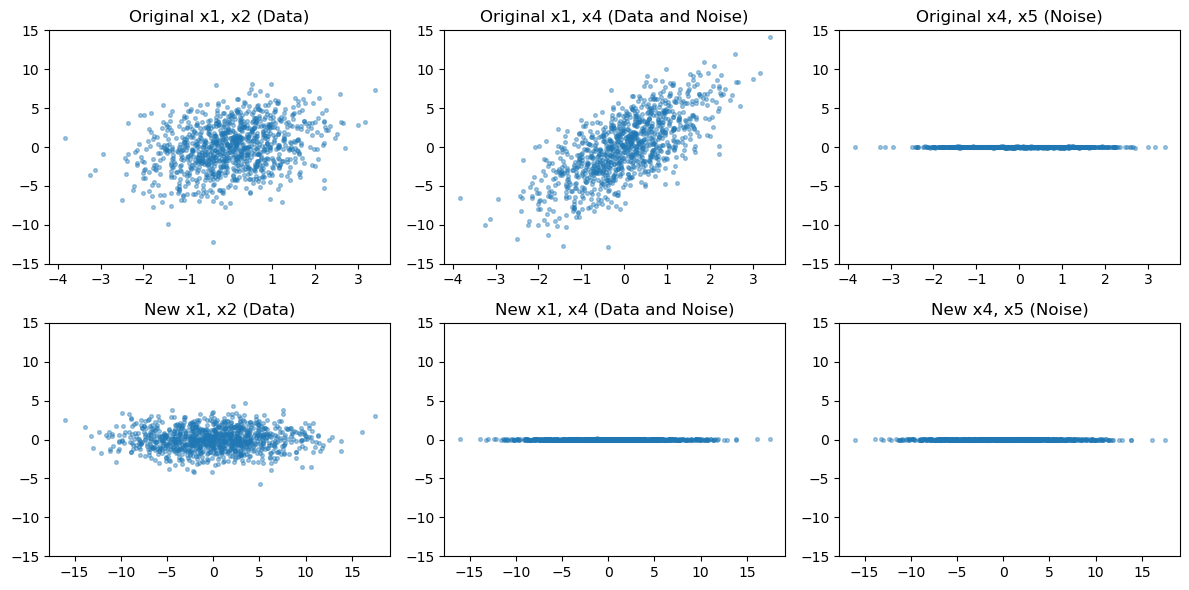

In [9]:
# Add noise to the existing dataset
N = 1000
mu, sigma = 0, 1/30
noise = np.random.normal(mu, sigma, (10, N))
X2 = np.concatenate((X, noise), axis=0)

# Perform SVD on the dataset with noise
U, S, Vs = la.svd(X2)
L = S**2 / (N - 1)
print("SVD Eigenvalues (with Noise):\n", L, "\n")
print("Comparing to the former section, we see that three eigenvalues are almost the same,")
print("and other eigenvalues (corresponding to the noise) are much smaller than the main components.")
print("-----------------------------\n")

print("SVD Eigenvectors (with Noise):\n", U)
print("-----------------------------\n")

Lambda = np.diag(np.real_if_close(L))

# Variability explained by each principal component including noise
for i in range(5):
    variability = Lambda[i, i] / Lambda.trace() * 100
    print(f"By selecting the component {i}, we retain {variability:.2f}% of the total variability")

print()

#transform data to new basis from PCA including noise
Xp = np.dot(U.T, X2)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
[[ax01, ax02, ax03], [ax11, ax12, ax13]] = axes

original_titles = ['Original x1, x2 (Data)', 'Original x1, x4 (Data and Noise)', 'Original x4, x5 (Noise)']
for i in range(3):
    axes[0, i].scatter(X2[0], X2[i + 1], alpha=0.4, s=7)
    axes[0, i].set_title(original_titles[i])

#new basis plots including noise
new_titles = ['New x1, x2 (Data)', 'New x1, x4 (Data and Noise)', 'New x4, x5 (Noise)']
for i in range(3):
    axes[1, i].scatter(Xp[0], Xp[i + 1], alpha=0.4, s=7)
    axes[1, i].set_title(new_titles[i])

plt.setp(axes, ylim=[-15, 15])
plt.tight_layout()
plt.show()


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

SVD Eigenvalues:
 [9.0889438e+05 7.9932359e+04 3.9685289e+04 2.5484635e+04 1.5638586e+04
 8.2561631e+03 2.2343474e+03 1.0739527e+01 6.6356421e-01 8.0454396e-03] 

SVD Eigenvectors:
 [[-2.66208887e-01 -2.37028971e-01 -6.48100823e-02  8.45567465e-01
   1.97035745e-01 -2.03095209e-02  3.38391483e-01 -3.87754384e-03
   2.47960351e-03  5.47122472e-05]
 [-1.08402193e-01 -8.28303695e-02  2.48731375e-02  3.16062421e-01
   1.86340883e-02  2.37992723e-02 -9.37935174e-01 -1.40159093e-02
   6.44919928e-03  9.03367036e-05]
 [-1.24913678e-02  1.91976782e-03  1.42306730e-03  8.69227760e-03
  -9.34344810e-03 -2.07020319e-04 -1.18966624e-02  9.82829094e-01
  -1.83177426e-01 -5.19138621e-03]
 [-1.50702300e-03  7.18467636e-04  1.29737332e-03 -1.98083883e-03
  -4.74005053e-03 -8.44566312e-05  2.84033734e-03  1.59869269e-01
   8.43313575e-01  5.13054669e-01]
 [-8.50661076e-04  3.99155717e-04  7.39580253e-04 -1.15795224e-03
  -2.71812454e-03 -4.93035805e-05  1.68916257e-03  8.96129459e-02
   5.05181670e-01 

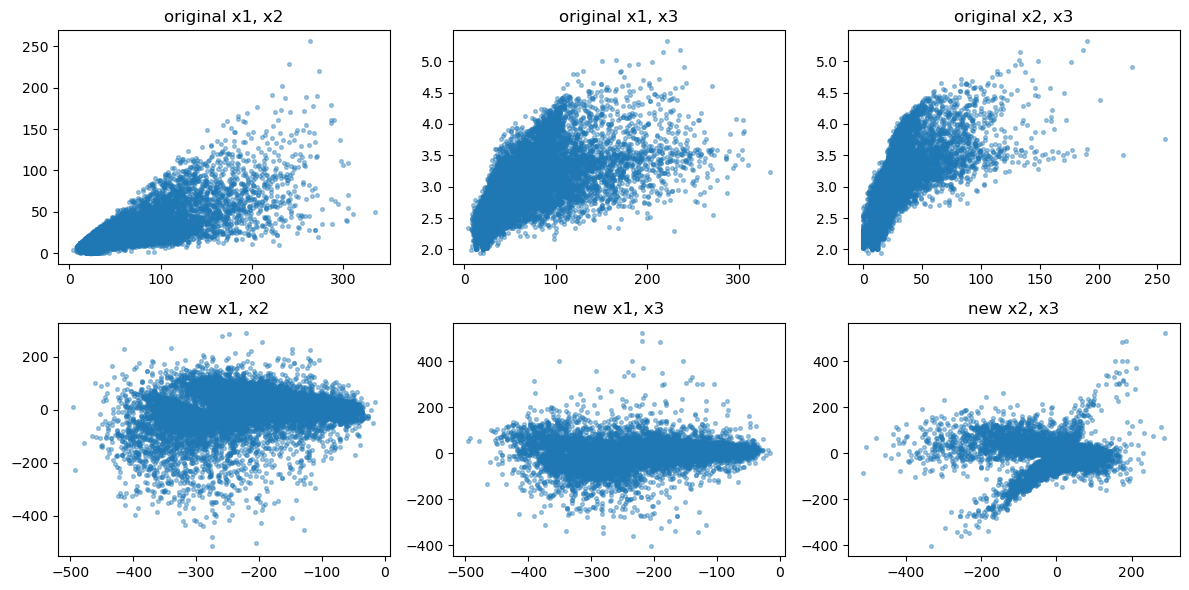

In [17]:
magic_data = pd.read_csv('magic04.data', header=None)
data = magic_data.to_numpy()
data = data[:,:-1]
d = np.asarray(data, dtype='float32')
d = d.T
U, S, V = la.svd(d)
L = S**2/(N-1)
print("SVD Eigenvalues:\n", L, "\n")
print("SVD Eigenvectors:\n", U)
Lambda = np.diag(np.real_if_close(L))
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()*100))
print("By selecting the component 3, we retain %.2f%% of the total variability" % (Lambda[3, 3]/Lambda.trace()*100))
print("By selecting the component 4, we retain %.2f%% of the total variability" % (Lambda[4, 4]/Lambda.trace()*100))
print("By selecting the component 5, we retain %.2f%% of the total variability" % (Lambda[5, 5]/Lambda.trace()*100))
print("By selecting the component 6, we retain %.2f%% of the total variability" % (Lambda[6, 6]/Lambda.trace()*100))
print("By selecting the component 7, we retain %.2f%% of the total variability" % (Lambda[7, 7]/Lambda.trace()*100))
print("By selecting the component 8, we retain %.2f%% of the total variability" % (Lambda[8, 8]/Lambda.trace()*100))
print("By selecting the component 9, we retain %.2f%% of the total variability" % (Lambda[9, 9]/Lambda.trace()*100))
print()

d_pca = np.dot(U.T, d)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes
#************
ax01.scatter(d[0], d[1], alpha = 0.4, s=7)
ax01.set_title('original x1, x2')
ax02.scatter(d[0], d[2], alpha = 0.4, s=7)
ax02.set_title('original x1, x3')
ax03.scatter(d[1], d[2], alpha = 0.4, s=7)
ax03.set_title('original x2, x3')
#************
ax11.scatter(d_pca[0], d_pca[1], alpha = 0.4, s=7)
ax11.set_title('new x1, x2')
ax12.scatter(d_pca[0], d_pca[2], alpha = 0.4, s=7)
ax12.set_title('new x1, x3')
ax13.scatter(d_pca[1], d_pca[2], alpha = 0.4, s=7)
ax13.set_title('new x2, x3')
plt.tight_layout()
plt.show()